# Question 1

In [1]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [2]:
# read the csv file into dataframe
df = pd.read_csv('sheet1.csv')

In [3]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# check the statistics
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='order_amount'>

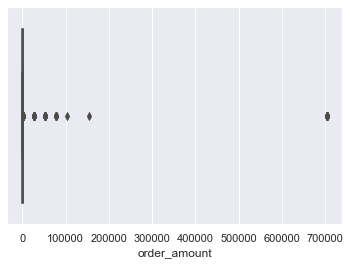

In [5]:
# check the distribution
sns.boxplot(df['order_amount'])

In [6]:
# check outliers
df.groupby('order_amount').size().reset_index(name='count').sort_values(by=['order_amount'], ascending=False).head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [7]:
# check details of outliers
df[df['order_amount'].isin([704000, 51450, 25725])].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00


We can conclude that the reason we get \$3145.13 for AOV is that we have large orders such as 17 orders with order_amount equal to $704000. User 607 might be the retailer who placed the same order at the same time in shop 42.

To deal with the outliers, we remove the data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.

In [8]:
amount = sorted(df['order_amount'])
q1, q3 = np.percentile(amount, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
new_df = df[(df['order_amount'] > lower_bound) & (df['order_amount'] < upper_bound)]

D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='order_amount'>

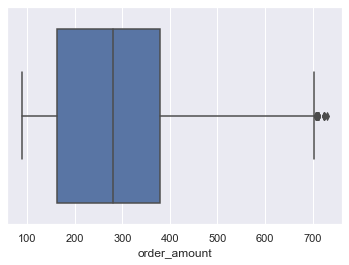

In [9]:
sns.boxplot(new_df['order_amount'])

In [10]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


Now AOV = \$ 293.72, which makes more sense for order of sneakers.

## Q1 answer:
1.  the reason we get \$3145.13 for AOV is that we have some large orders such as 17 orders with each order_amount equal to \$704000. We could remove outliers to calculate the AOV of the rest of the orders.
2. I report the average order value for orders with order_amount falling inside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.
3. Its value is \$293.72.

# Questions 2

a.

    SELECT COUNT(OrderID)
    FROM Orders o 
    JOIN Shippers s
    ON o.ShipperID = s.ShipperID
    WHERE ShipperName = 'Speedy Express'


54 orders were shipped by Speedy Express in total

b.

    SELECT e.LastName
    FROM (SELECT EmployeeID, COUNT(EmployeeID) as cnt
          FROM Orders
          GROUP BY EmployeeID
          ORDER BY cnt DESC
          LIMIT 1) t
    JOIN Employees e
    ON t.EmployeeID = e.EmployeeID

Peacock is the last name.

c.

    SELECT p.ProductName, SUM(od.quantity)
    FROM Orders o
    JOIN OrderDetails od
    ON o.OrderID = od.OrderID	
    JOIN Customers c
    ON c.CustomerID = o.CustomerID
    JOIN Products p
    ON p.ProductID = od.ProductID
    WHERE c.Country = 'Germany'
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 1
    
Boston Crab Meat was ordered the most by customers in Germany. The total quantity was 160.